In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Reading Data

In [6]:
train_data=pd.read_csv('data_train.csv')
test_data=pd.read_csv('data_test.csv')
print(train_data.head())

   emotion   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...    p2295  p2296  \
0        0   70   80   82   72   58   58   60   63   54  ...      159    182   
1        0  151  150  147  155  148  133  111  140  170  ...      105    108   
2        2  231  212  156  164  174  138  161  173  182  ...      104    138   
3        4   24   32   36   30   32   23   19   20   30  ...      174    126   
4        6    4    0    0    0    0    0    0    0    0  ...       12     34   

   p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304  
0    183    136    106    116     95    106    109     82  
1     95    108    102     67    171    193    183    184  
2    152    122    114    101     97     88    110    152  
3    132    132    133    136    139    142    143    142  
4     31     31     31     27     31     30     29     30  

[5 rows x 2305 columns]


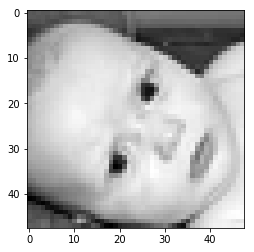

Emotion is Sad
4


In [3]:
#Showing images in the dataset
index=170
img=np.array(train_data.loc[index,'p1':'p2304']).reshape(48,48)
plt.imshow(img,cmap='gray')
plt.show()
print('Emotion is Sad')
print(train_data['emotion'][170])

In [7]:
#Randomizing the dataset
np.random.seed(1)
shuffled_index=np.random.permutation(train_data.index)
final_data_train=train_data.loc[shuffled_index]
print(final_data_train.head())

       emotion   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...    p2295  \
1239         0   70   80   82   72   58   58   60   63   54  ...      159   
6674         0  151  150  147  155  148  133  111  140  170  ...      105   
11209        2  231  212  156  164  174  138  161  173  182  ...      104   
21998        4   24   32   36   30   32   23   19   20   30  ...      174   
20847        6    4    0    0    0    0    0    0    0    0  ...       12   

       p2296  p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304  
1239     182    183    136    106    116     95    106    109     82  
6674     108     95    108    102     67    171    193    183    184  
11209    138    152    122    114    101     97     88    110    152  
21998    126    132    132    133    136    139    142    143    142  
20847     34     31     31     31     27     31     30     29     30  

[5 rows x 2305 columns]


In [8]:
#Getting feature and target columns
X_train=final_data_train.loc[:,'p1':'p2304']
y_train=final_data_train['emotion']
X_test=test_data.loc[:,'p1':'p2304']
y_test=test_data['emotion']


In [9]:
#Moving 9000 rows from training to testing in main multiclass datasets
pixel_cols=final_data_train.columns.drop('emotion')
rows_9000=final_data_train.iloc[:9000]
print(rows_9000.shape)
X_train_9=final_data_train.iloc[9000:][pixel_cols]
y_train_9=final_data_train.iloc[9000:]['emotion']
print(X_train_9.shape)
new_test=pd.concat((test_data,rows_9000),axis=0)
X_test_9=new_test[pixel_cols]
y_test_9=new_test['emotion']
print(X_test_9.shape)

(9000, 2305)
(19709, 2304)
(16178, 2304)


In [10]:
#Moving 16000 rows from training to testing in main multiclass datasets
pixel_cols=final_data_train.columns.drop('emotion')
rows_16000=final_data_train.iloc[:16000]
print(rows_16000.shape)
X_train_16=final_data_train.iloc[16000:][pixel_cols]
y_train_16=final_data_train.iloc[16000:]['emotion']
print(X_train_16.shape)
new_test=pd.concat((test_data,rows_16000),axis=0)
X_test_16=new_test[pixel_cols]
y_test_16=new_test['emotion']
print(X_test_16.shape)

(16000, 2305)
(12709, 2304)
(23178, 2304)


## Reading Happy Dataset

In [11]:
train_data_happy=pd.read_csv('training_happy_data.csv')
test_data_happy=pd.read_csv('testing_happy_data.csv')
print(train_data_happy.head())

    p1   p2   p3   p4   p5   p6   p7   p8   p9  p10    ...     p2296  p2297  \
0   70   80   82   72   58   58   60   63   54   58    ...       182    183   
1  151  150  147  155  148  133  111  140  170  174    ...       108     95   
2  231  212  156  164  174  138  161  173  182  200    ...       138    152   
3   24   32   36   30   32   23   19   20   30   41    ...       126    132   
4    4    0    0    0    0    0    0    0    0    0    ...        34     31   

   p2298  p2299  p2300  p2301  p2302  p2303  p2304   emotion  
0    136    106    116     95    106    109     82  NotHappy  
1    108    102     67    171    193    183    184  NotHappy  
2    122    114    101     97     88    110    152  NotHappy  
3    132    133    136    139    142    143    142  NotHappy  
4     31     31     27     31     30     29     30  NotHappy  

[5 rows x 2305 columns]


In [12]:
#Randomizing the dataset
np.random.seed(1)
shuffled_index=np.random.permutation(train_data_happy.index)
train_data_happy=train_data_happy.loc[shuffled_index]
print(train_data_happy.head())

        p1   p2   p3   p4   p5   p6   p7   p8   p9  p10    ...     p2296  \
1239    70   80   82   72   58   58   60   63   54   58    ...       182   
6674   151  150  147  155  148  133  111  140  170  174    ...       108   
11209  231  212  156  164  174  138  161  173  182  200    ...       138   
21998   24   32   36   30   32   23   19   20   30   41    ...       126   
20847    4    0    0    0    0    0    0    0    0    0    ...        34   

       p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304   emotion  
1239     183    136    106    116     95    106    109     82  NotHappy  
6674      95    108    102     67    171    193    183    184  NotHappy  
11209    152    122    114    101     97     88    110    152  NotHappy  
21998    132    132    133    136    139    142    143    142  NotHappy  
20847     31     31     31     27     31     30     29     30  NotHappy  

[5 rows x 2305 columns]


In [13]:
#Splitting final_data_happy into train and test set
X_train_happy=train_data_happy.loc[:,'p1':'p2304']
y_train_happy=train_data_happy['emotion']
X_test_happy=test_data_happy.loc[:,'p1':'p2304']
y_test_happy=test_data_happy['emotion']

In [14]:
#Moving 9000 rows from training to testing in happy datasets
pixel_cols=train_data_happy.columns.drop('emotion')
rows_9000=train_data_happy.iloc[:9000]
print(rows_9000.shape)
X_train_9th=train_data_happy.iloc[9000:][pixel_cols]
y_train_9th=train_data_happy.iloc[9000:]['emotion']
print(X_train_9th.shape)
new_test=pd.concat((test_data_happy,rows_9000),axis=0)
X_test_9th=new_test[pixel_cols]
y_test_9th=new_test['emotion']
print(X_test_9th.shape)

(9000, 2305)
(19709, 2304)
(16178, 2304)


In [15]:
#Moving 16000 rows from training to testing
pixel_cols=train_data_happy.columns.drop('emotion')
rows_16000=train_data_happy.iloc[:16000]
print(rows_16000.shape)
X_train_16th=train_data_happy.iloc[16000:][pixel_cols]
y_train_16th=train_data_happy.iloc[16000:]['emotion']
print(X_train_16th.shape)
new_test=pd.concat((test_data_happy,rows_16000),axis=0)
X_test_16th=new_test[pixel_cols]
y_test_16th=new_test['emotion']
print(X_test_16th.shape)

(16000, 2305)
(12709, 2304)
(23178, 2304)


## Function for Neural Network

In [16]:
def run_nn(nn,X_train,y_train,X_test,y_test):
    nn.fit(X_train,y_train)
    train_predictions=nn.predict(X_train)
    test_predictions=nn.predict(X_test)
    train_accuracy=accuracy_score(y_train,train_predictions)
    test_accuracy=accuracy_score(y_test,test_predictions)
    c_matrix=confusion_matrix(test_predictions,y_test)
    ax=plt.subplot()
    cm=pd.DataFrame(c_matrix)
    
    #Finding the relative percent of actual vs prediction
    row_sum=cm.sum(axis=0)
    cm=cm.apply(lambda x:x/row_sum,axis=1)
    sns.heatmap(cm,annot=True,ax=ax)
    ax.set_xlabel('True labels')
    ax.set_ylabel('Predicted labels')
    plt.show()
    test_predictions=pd.DataFrame(test_predictions)
    test_predictions[0].value_counts().sort_index().plot.bar()
    plt.show()
    print(nn.out_activation_)
    print("Accuracy on training set :",train_accuracy)
    print("Accuracy on testing set :",test_accuracy)
    
    

## MLP on multiclass datasets

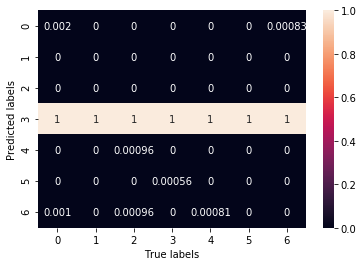

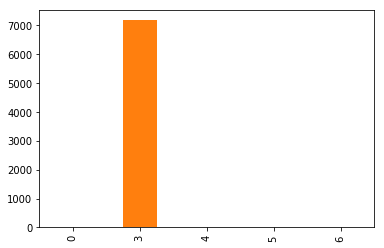

Accuracy on training set : 0.25159357692709605
Accuracy on testing set : 0.24881582613541375


In [16]:
clf=MLPClassifier()
run_nn(clf,X_train,y_train,X_test,y_test)


In [17]:
clf.out_activation_

'softmax'

In [24]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Features Scaling

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)

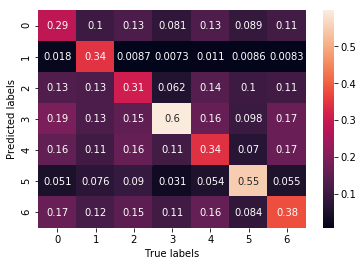

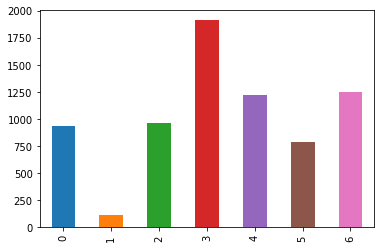

softmax
Accuracy on training set : 0.9224981713051656
Accuracy on testing set : 0.42323767066035106


In [32]:
clf=MLPClassifier()
run_nn(clf,X_train,y_train,X_test,y_test)

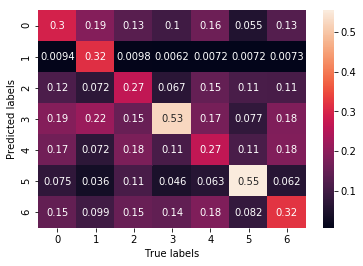

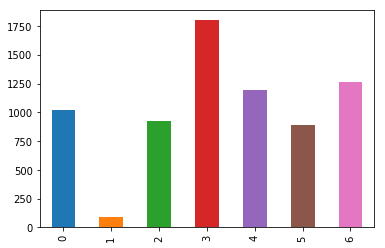

softmax
Accuracy on training set : 0.9673273189592114
Accuracy on testing set : 0.3783783783783784


In [25]:
clf=MLPClassifier(activation='logistic')
run_nn(clf,X_train,y_train,X_test,y_test)

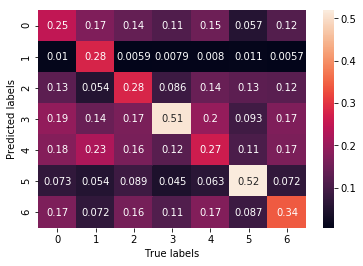

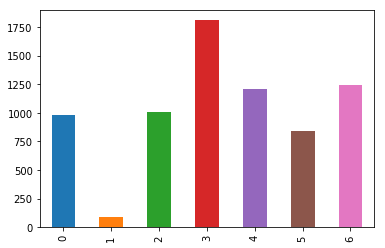

softmax
Accuracy on training set : 0.9086349228464942
Accuracy on testing set : 0.36862635831707996


In [26]:
clf=MLPClassifier(activation='tanh')
run_nn(clf,X_train,y_train,X_test,y_test)

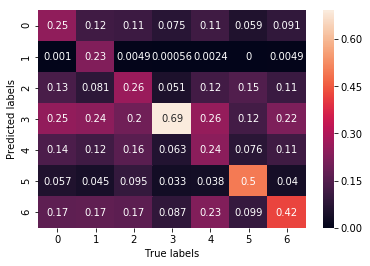

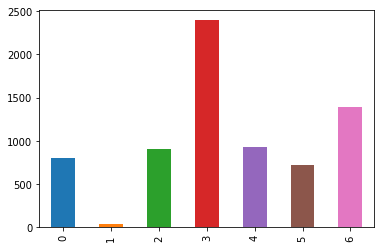

softmax
Accuracy on training set : 0.571876415061479
Accuracy on testing set : 0.41696851490665926


In [18]:
clf=MLPClassifier(alpha=0.9)
run_nn(clf,X_train,y_train,X_test,y_test)

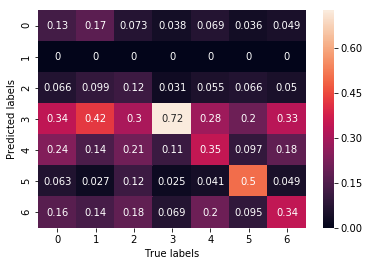

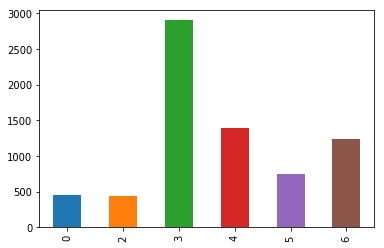

softmax
Accuracy on training set : 0.4213312898394232
Accuracy on testing set : 0.3904987461688493


In [88]:
clf=MLPClassifier(alpha=0.999,activation='logistic')
run_nn(clf,X_train,y_train,X_test,y_test)

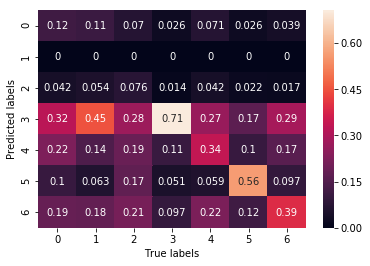

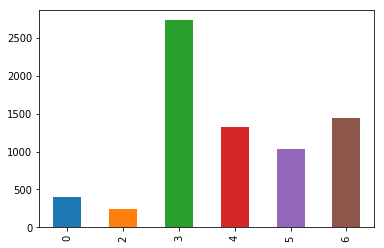

softmax
Accuracy on training set : 0.41830088125674875
Accuracy on testing set : 0.3925884647534132


In [93]:
clf=MLPClassifier(alpha=0.999,activation='logistic',hidden_layer_sizes=(200,))
run_nn(clf,X_train,y_train,X_test,y_test)

C:\Users\mpfou\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


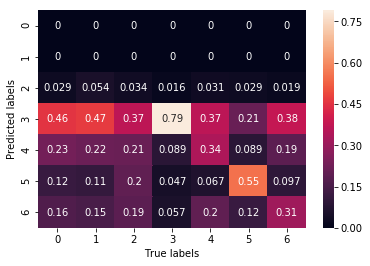

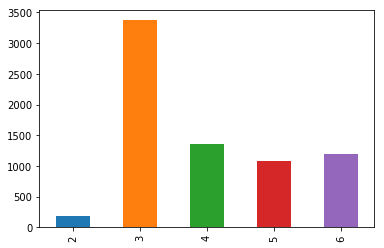

softmax
Accuracy on training set : 0.37556167055627154
Accuracy on testing set : 0.3768459180830315


In [97]:
clf=MLPClassifier(alpha=0.999,activation='logistic',hidden_layer_sizes=(20,20),solver='sgd')
run_nn(clf,X_train,y_train,X_test,y_test)

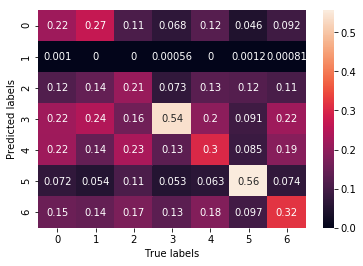

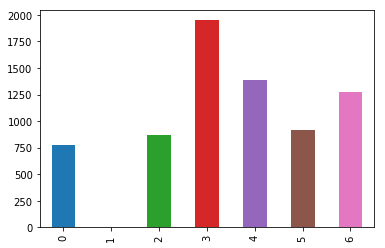

softmax
Accuracy on training set : 0.6369779511651399
Accuracy on testing set : 0.36486486486486486


In [99]:
clf=MLPClassifier(activation='logistic',hidden_layer_sizes=(20,20))
run_nn(clf,X_train,y_train,X_test,y_test)

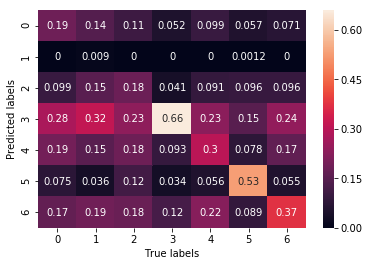

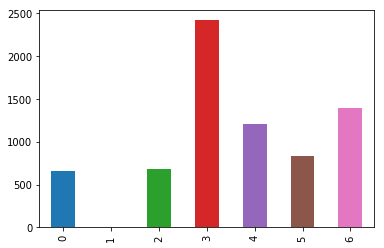

softmax
Accuracy on training set : 0.478456233236964
Accuracy on testing set : 0.39133463360267484


In [89]:
clf=MLPClassifier(alpha=0.999,activation='tanh')
run_nn(clf,X_train,y_train,X_test,y_test)

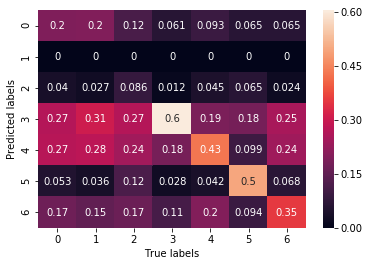

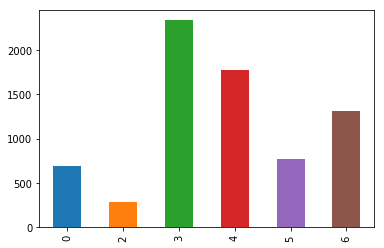

softmax
Accuracy on training set : 0.41861437179978406
Accuracy on testing set : 0.38074672610755084


In [23]:
clf=MLPClassifier(alpha=0.9,batch_size=100)
run_nn(clf,X_train,y_train,X_test,y_test)

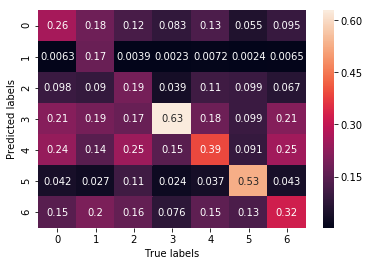

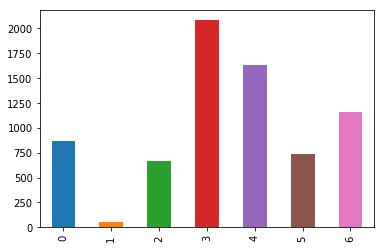

softmax
Accuracy on training set : 0.5356856734821833
Accuracy on testing set : 0.40443020339927555


In [19]:
clf=MLPClassifier(alpha=0.99)
run_nn(clf,X_train,y_train,X_test,y_test)

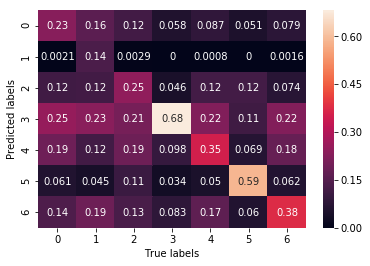

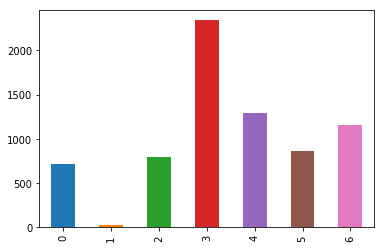

softmax
Accuracy on training set : 0.5711101048451706
Accuracy on testing set : 0.43048202842017275


In [31]:
clf=MLPClassifier(alpha=0.999)
run_nn(clf,X_train,y_train,X_test,y_test)

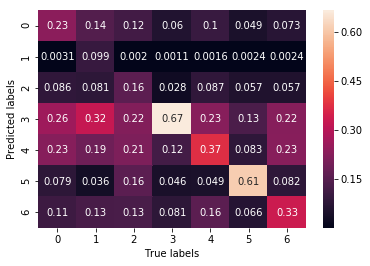

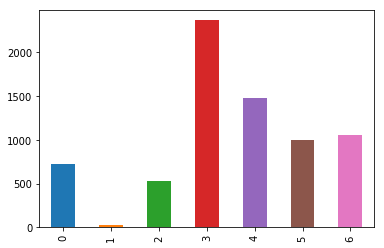

softmax
Accuracy on training set : 0.5012713783134208
Accuracy on testing set : 0.41320702145444416


In [34]:
clf=MLPClassifier(alpha=0.999,early_stopping=True)
run_nn(clf,X_train,y_train,X_test,y_test)

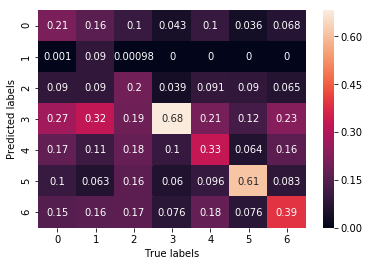

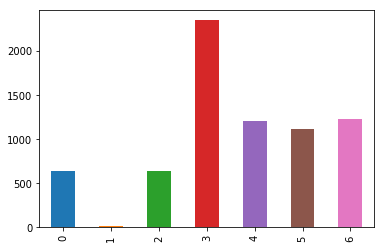

softmax
Accuracy on training set : 0.5444982409697308
Accuracy on testing set : 0.4212872666480914


In [38]:
clf=MLPClassifier(alpha=0.999,momentum=0)
run_nn(clf,X_train,y_train,X_test,y_test)

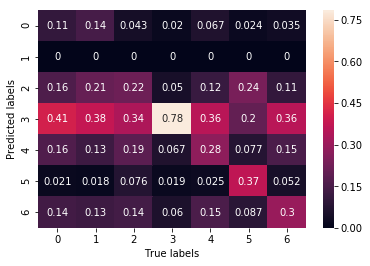

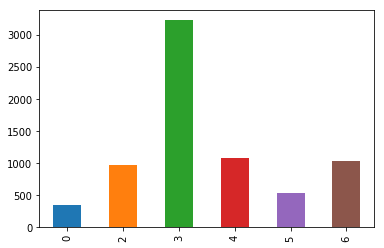

softmax
Accuracy on training set : 0.4170469190846076
Accuracy on testing set : 0.38200055725828924


In [33]:
clf=MLPClassifier(alpha=0.999,batch_size=100)
run_nn(clf,X_train,y_train,X_test,y_test)

C:\Users\mpfou\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


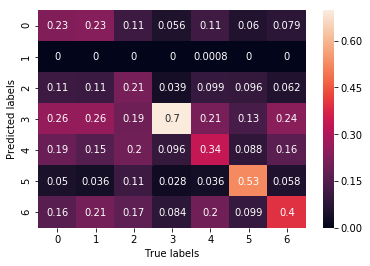

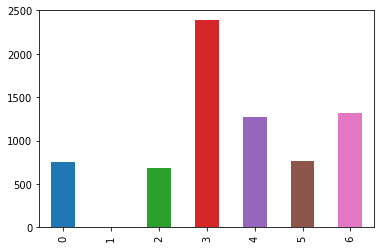

softmax
Accuracy on training set : 0.5211954439374412
Accuracy on testing set : 0.4197548063527445


In [69]:
clf=MLPClassifier(alpha=0.999,momentum=0,solver='sgd')
run_nn(clf,X_train,y_train,X_test,y_test)

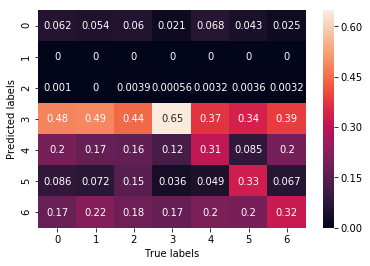

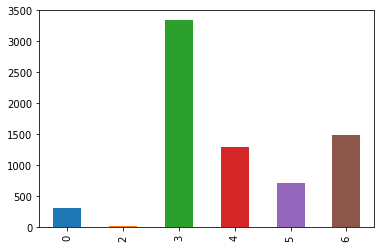

softmax
Accuracy on training set : 0.31268940053641714
Accuracy on testing set : 0.31512956255224295


In [90]:
clf=MLPClassifier(alpha=0.999,activation='logistic',learning_rate_init=0.01)
run_nn(clf,X_train,y_train,X_test,y_test)

Iteration 1, loss = 2.55427066
Iteration 2, loss = 2.35294939
Iteration 3, loss = 2.28478231
Iteration 4, loss = 2.24210528
Iteration 5, loss = 2.21101226
Iteration 6, loss = 2.18628145
Iteration 7, loss = 2.16589873
Iteration 8, loss = 2.14811216
Iteration 9, loss = 2.13225345
Iteration 10, loss = 2.11835361
Iteration 11, loss = 2.10585052
Iteration 12, loss = 2.09401026
Iteration 13, loss = 2.08319213
Iteration 14, loss = 2.07295103
Iteration 15, loss = 2.06344029
Iteration 16, loss = 2.05418940
Iteration 17, loss = 2.04545702
Iteration 18, loss = 2.03737141
Iteration 19, loss = 2.02970198
Iteration 20, loss = 2.02201764
Iteration 21, loss = 2.01465904
Iteration 22, loss = 2.00780846
Iteration 23, loss = 2.00120750
Iteration 24, loss = 1.99429559
Iteration 25, loss = 1.98824272
Iteration 26, loss = 1.98202528
Iteration 27, loss = 1.97629670
Iteration 28, loss = 1.97041476
Iteration 29, loss = 1.96439610
Iteration 30, loss = 1.95903703
Iteration 31, loss = 1.95372288
Iteration 32, los

C:\Users\mpfou\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


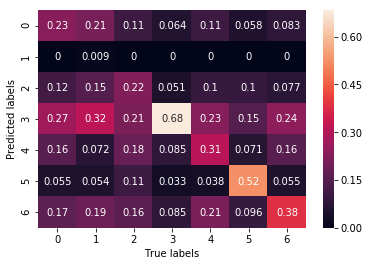

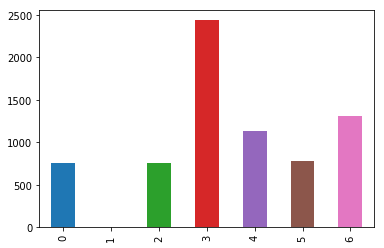

softmax
Accuracy on training set : 0.5252708209968999
Accuracy on testing set : 0.4125104485929228


In [68]:
clf=MLPClassifier(alpha=0.999,momentum=0.5,solver='sgd',verbose=True,learning_rate='adaptive',max_iter=100,tol=0.00001)
run_nn(clf,X_train,y_train,X_test,y_test)

In [63]:
clf

MLPClassifier(activation='relu', alpha=0.999, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.99,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0, validation_fraction=0.1,
       verbose=True, warm_start=False)

## After moving 9000 rows 

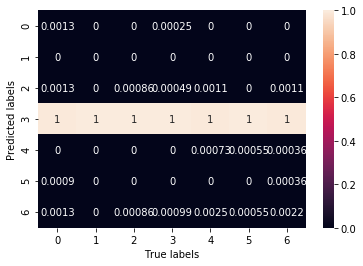

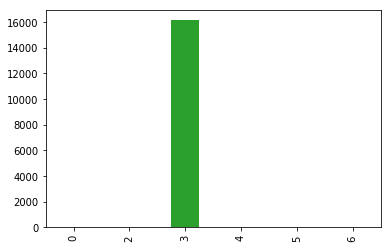

softmax
Accuracy on training set : 0.25171241564767366
Accuracy on testing set : 0.2509580912350105


In [25]:
#Without Scaling Features
clf=MLPClassifier()
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

In [44]:
scaler = StandardScaler()  
# Fit only on training data
scaler.fit(X_train_9)  
X_train_9 = scaler.transform(X_train_9)  
# apply same transformation to test data
X_test_9 = scaler.transform(X_test_9)

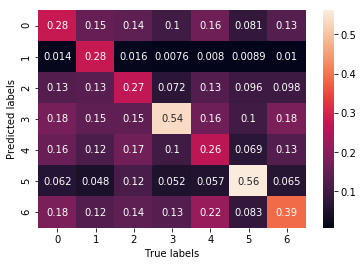

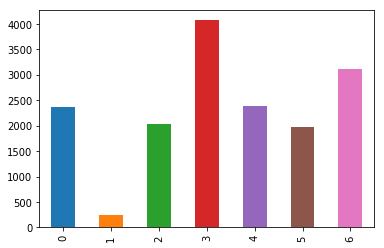

softmax
Accuracy on training set : 0.9266325029174489
Accuracy on testing set : 0.38972678946717765


In [34]:
#After Scaling Features
clf=MLPClassifier()
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

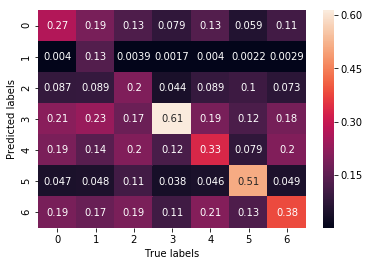

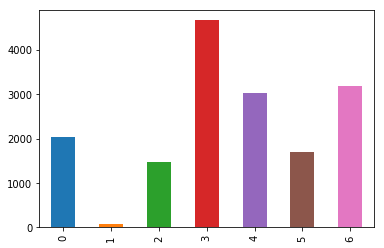

softmax
Accuracy on training set : 0.6998325638033386
Accuracy on testing set : 0.39986401285696627


In [45]:
clf=MLPClassifier(alpha=0.9)
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

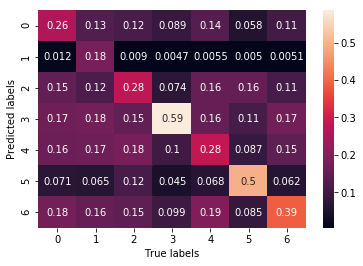

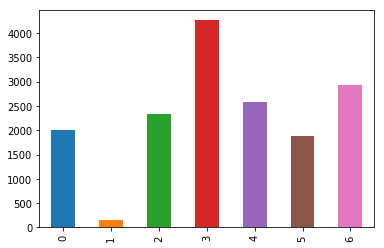

softmax
Accuracy on training set : 0.6924755187985184
Accuracy on testing set : 0.3954135245394981


In [46]:

clf=MLPClassifier(alpha=0.99)
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

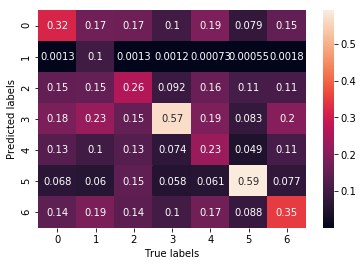

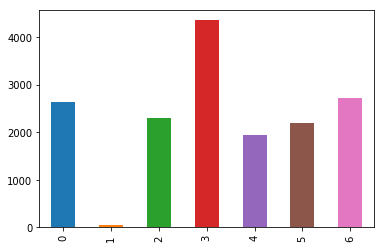

softmax
Accuracy on training set : 0.6610178091227358
Accuracy on testing set : 0.38947954011620717


In [47]:
clf=MLPClassifier(alpha=0.999)
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

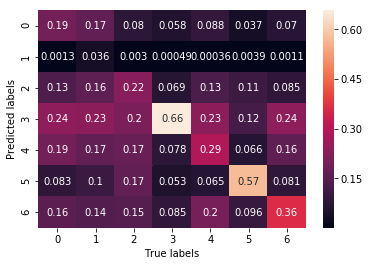

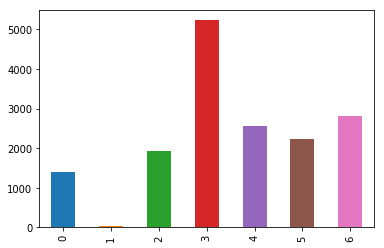

softmax
Accuracy on training set : 0.5380790501801208
Accuracy on testing set : 0.3991222648040549


In [70]:
clf=MLPClassifier(alpha=1.999)
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

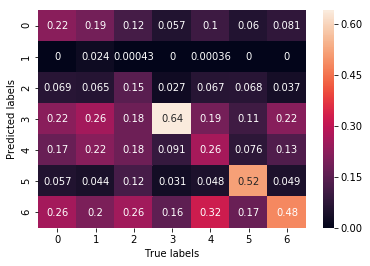

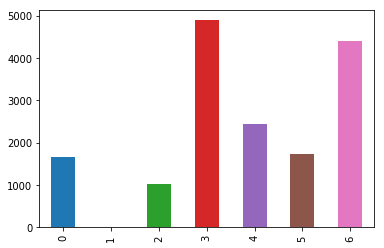

softmax
Accuracy on training set : 0.5376731442488203
Accuracy on testing set : 0.39751514402274696


In [73]:
clf=MLPClassifier(alpha=1.999,momentum=0)
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

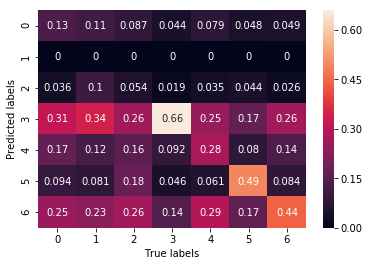

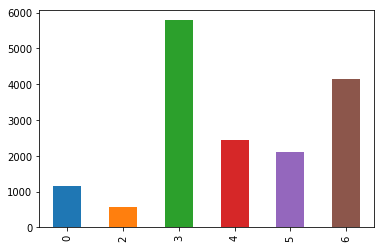

softmax
Accuracy on training set : 0.38931452635851643
Accuracy on testing set : 0.3690814686611448


In [77]:
clf=MLPClassifier(activation='logistic',alpha=1.999)
run_nn(clf,X_train_9,y_train_9,X_test_9,y_test_9)

## After moving 16000 rows

In [49]:
scaler = StandardScaler()  
# Fit only on training data
scaler.fit(X_train_16)  
X_train_16 = scaler.transform(X_train_16)  
# apply same transformation to test data
X_test_16 = scaler.transform(X_test_16)

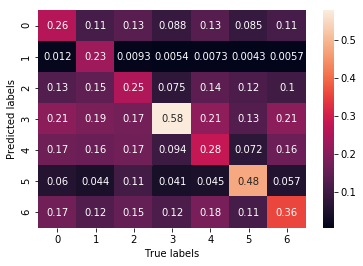

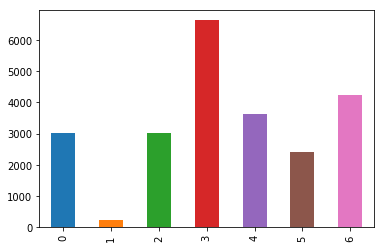

softmax
Accuracy on training set : 0.9824533794948461
Accuracy on testing set : 0.38212960566054016


In [43]:
clf=MLPClassifier()
run_nn(clf,X_train_16,y_train_16,X_test_16,y_test_16)

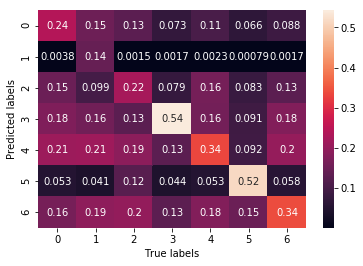

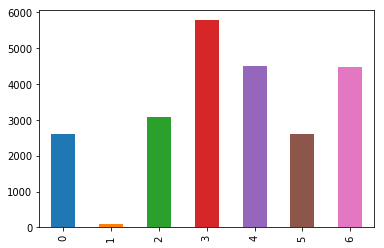

softmax
Accuracy on training set : 0.8213077346762137
Accuracy on testing set : 0.37557166278367415


In [50]:
clf=MLPClassifier(alpha=0.99)
run_nn(clf,X_train_16,y_train_16,X_test_16,y_test_16)

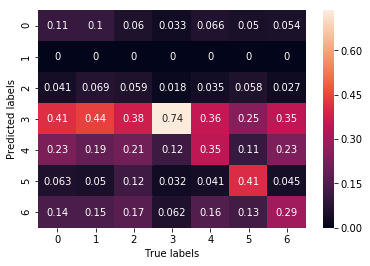

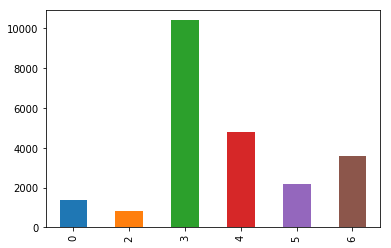

softmax
Accuracy on training set : 0.39617593831143283
Accuracy on testing set : 0.36159288980930193


In [75]:
clf=MLPClassifier(activation='logistic',alpha=1.999)
run_nn(clf,X_train_16,y_train_16,X_test_16,y_test_16)

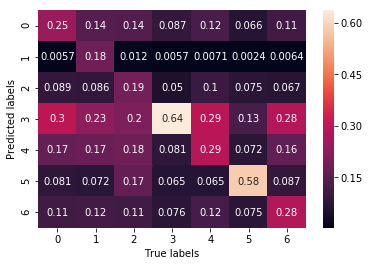

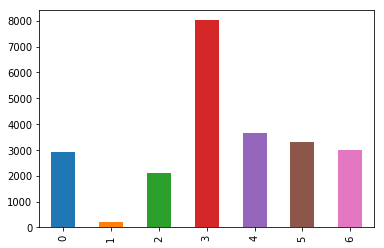

softmax
Accuracy on training set : 0.6610276182233064
Accuracy on testing set : 0.38463197860039694


In [74]:
clf=MLPClassifier(alpha=1.999,momentum=0)
run_nn(clf,X_train_16,y_train_16,X_test_16,y_test_16)

## With Binary class dataset

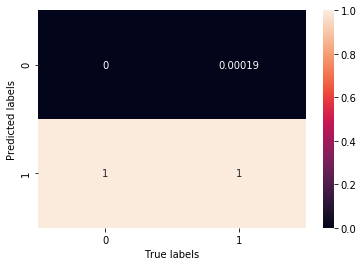

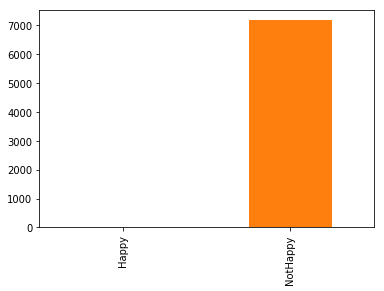

logistic
Accuracy on training set : 0.7487199136159393
Accuracy on testing set : 0.7527166341599332


In [11]:
clf_happy=MLPClassifier()
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

In [27]:
from sklearn.preprocessing import StandardScaler
#Scaling features of happy dataset
scaler = StandardScaler()  
# Fit only on training data
scaler.fit(X_train_happy)  
X_train_happy = scaler.transform(X_train_happy)  
# apply same transformation to test data
X_test_happy = scaler.transform(X_test_happy)

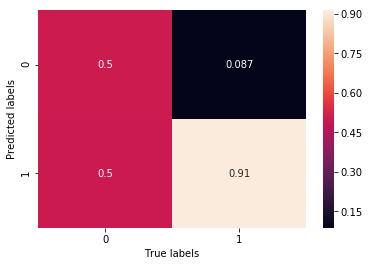

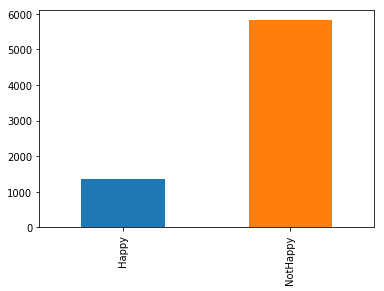

logistic
Accuracy on training set : 0.9596642167961267
Accuracy on testing set : 0.8113680691000279


In [14]:
clf_happy=MLPClassifier()
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

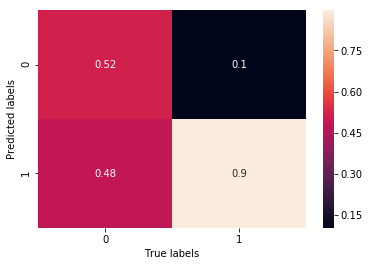

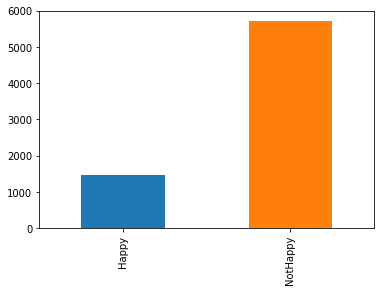

logistic
Accuracy on training set : 0.8491065519523494
Accuracy on testing set : 0.8021733073279464


In [30]:
clf_happy=MLPClassifier(alpha=0.9)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

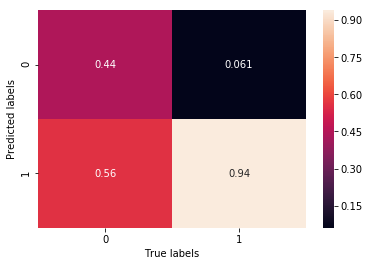

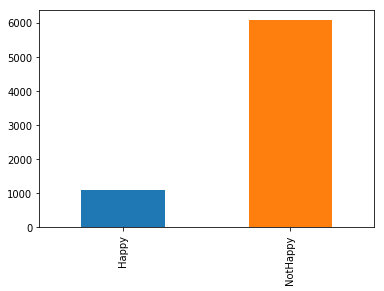

logistic
Accuracy on training set : 0.8475739315197325
Accuracy on testing set : 0.8158261354137643


In [28]:
clf_happy=MLPClassifier(alpha=0.99)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

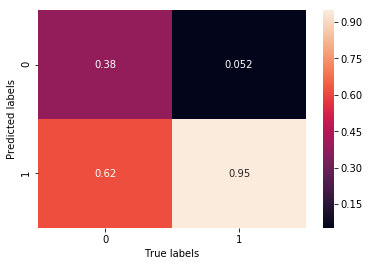

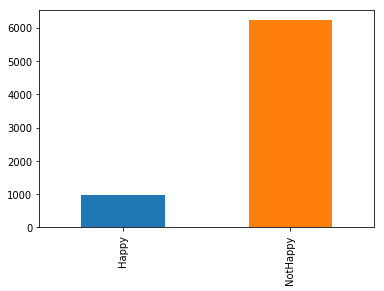

logistic
Accuracy on training set : 0.8412692883764673
Accuracy on testing set : 0.8085817776539426


In [32]:
clf_happy=MLPClassifier(alpha=0.999)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

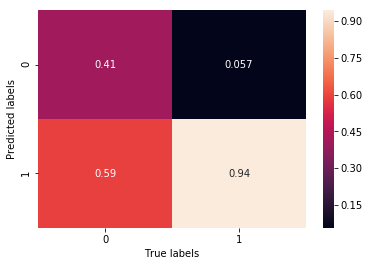

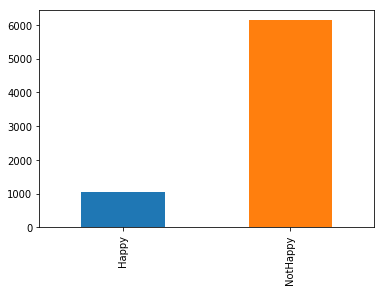

logistic
Accuracy on training set : 0.827928524156188
Accuracy on testing set : 0.8123432711061577


In [35]:
clf_happy=MLPClassifier(alpha=0.999,early_stopping=True)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

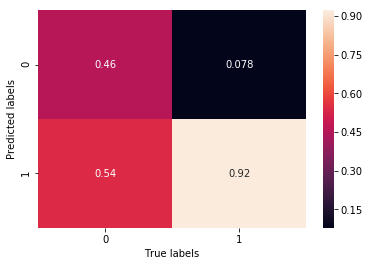

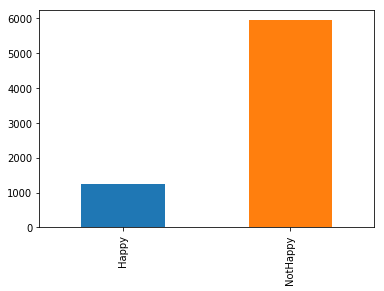

logistic
Accuracy on training set : 0.8468772858685429
Accuracy on testing set : 0.8070493173585958


In [72]:
clf_happy=MLPClassifier(alpha=0.999,momentum=0,solver='sgd')
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

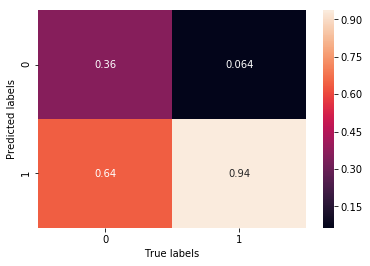

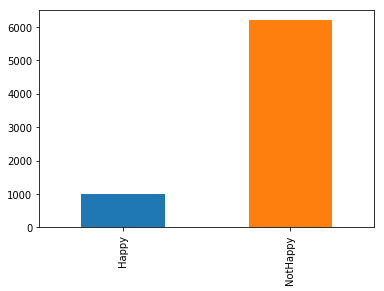

logistic
Accuracy on training set : 0.7991918910446202
Accuracy on testing set : 0.793396489272778


In [42]:
clf_happy=MLPClassifier(alpha=3.999)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

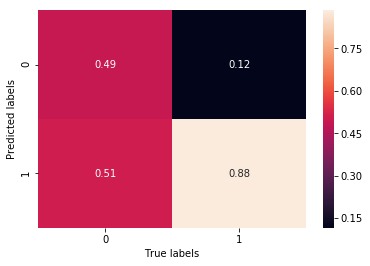

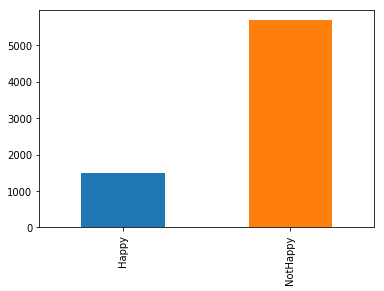

logistic
Accuracy on training set : 0.9957852938103033
Accuracy on testing set : 0.7872666480913904


In [29]:
clf_happy=MLPClassifier(activation='logistic')
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

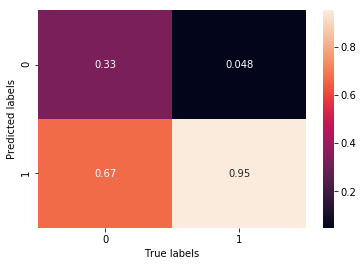

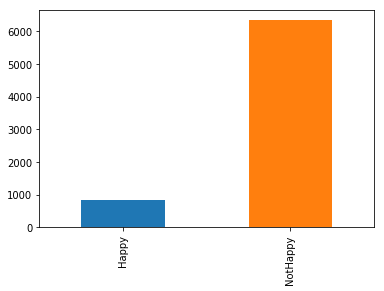

logistic
Accuracy on training set : 0.8047998885366958
Accuracy on testing set : 0.7982724993034271


In [86]:
clf_happy=MLPClassifier(activation='logistic',alpha=0.999)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

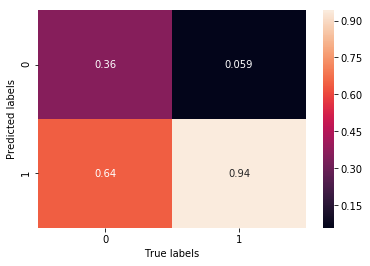

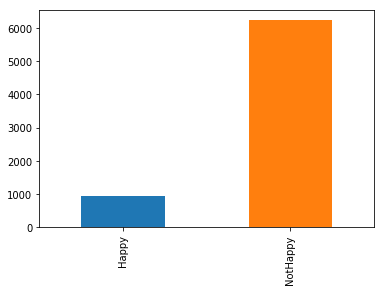

logistic
Accuracy on training set : 0.8014559894109861
Accuracy on testing set : 0.7970186681526887


In [94]:
clf_happy=MLPClassifier(activation='logistic',alpha=0.999,hidden_layer_sizes=(200,))
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

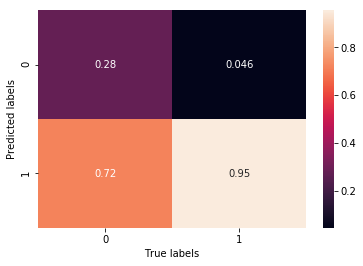

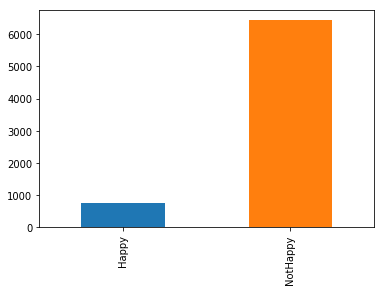

logistic
Accuracy on training set : 0.7915287888815354
Accuracy on testing set : 0.7881025355252159


In [96]:
clf_happy=MLPClassifier(activation='logistic',alpha=0.999,hidden_layer_sizes=(20,20))
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

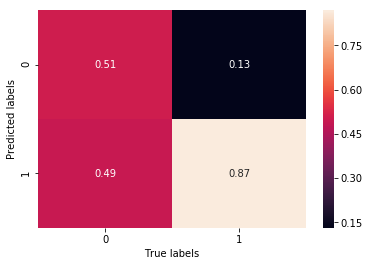

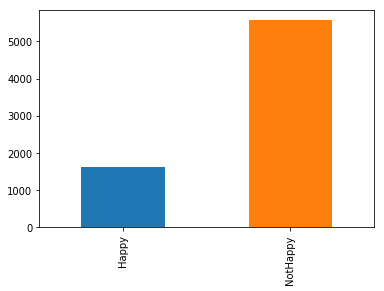

logistic
Accuracy on training set : 0.9587237451670207
Accuracy on testing set : 0.7791864028977431


In [98]:
clf_happy=MLPClassifier(activation='logistic',hidden_layer_sizes=(20,20))
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

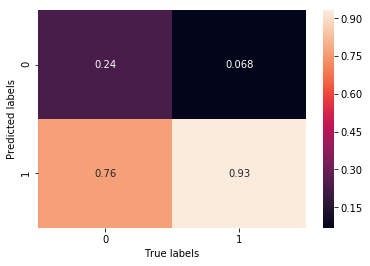

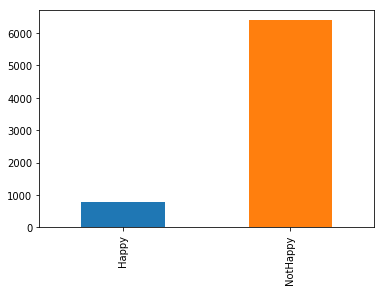

logistic
Accuracy on training set : 0.7519244836114111
Accuracy on testing set : 0.759543048202842


In [91]:
clf_happy=MLPClassifier(activation='logistic',alpha=0.999,learning_rate_init=0.01)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

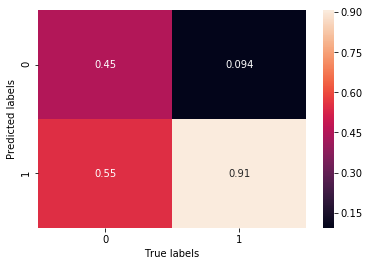

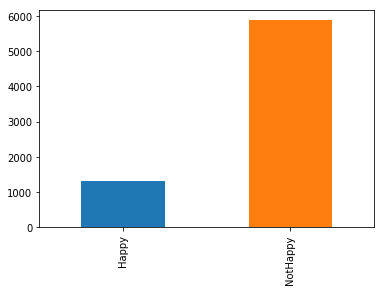

logistic
Accuracy on training set : 0.8173046779755477
Accuracy on testing set : 0.7932571747004736


In [87]:
clf_happy=MLPClassifier(activation='tanh',alpha=0.999)
run_nn(clf_happy,X_train_happy,y_train_happy,X_test_happy,y_test_happy)

In [33]:
scaler = StandardScaler()  
# Fit only on training data
scaler.fit(X_train_9th)  
X_train_9th = scaler.transform(X_train_9th)  
# apply same transformation to test data
X_test_9th = scaler.transform(X_test_9th)

In [34]:
scaler = StandardScaler()  
# Fit only on training data
scaler.fit(X_train_16th)  
X_train_16th = scaler.transform(X_train_16th)  
# apply same transformation to test data
X_test_16th = scaler.transform(X_test_16th)

## After moving 9000 from Happy dataset

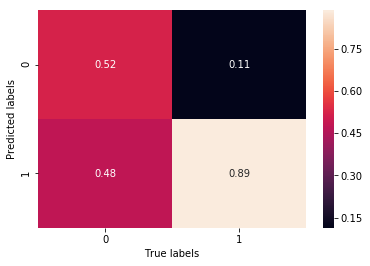

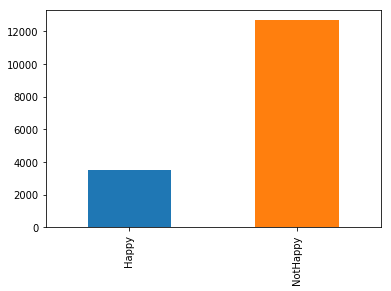

logistic
Accuracy on training set : 0.9930488609264803
Accuracy on testing set : 0.79564841142292


In [48]:
clf_happy=MLPClassifier()
run_nn(clf_happy,X_train_9th,y_train_9th,X_test_9th,y_test_9th)

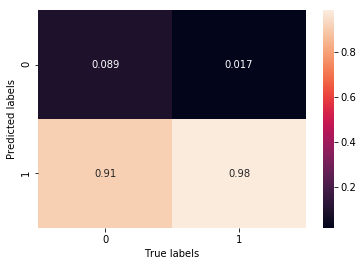

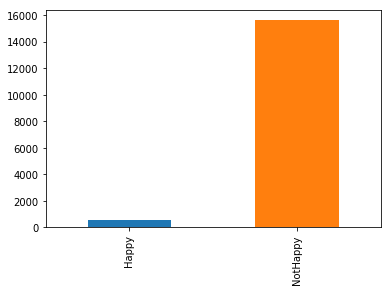

logistic
Accuracy on training set : 0.7598051651529758
Accuracy on testing set : 0.7590555074792928


In [78]:
clf_happy=MLPClassifier(alpha=1.999)
run_nn(clf_happy,X_train_9th,y_train_9th,X_test_9th,y_test_9th)

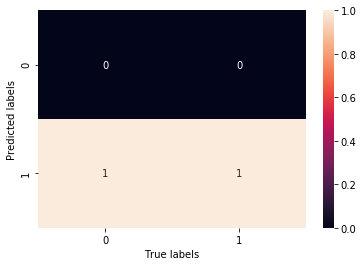

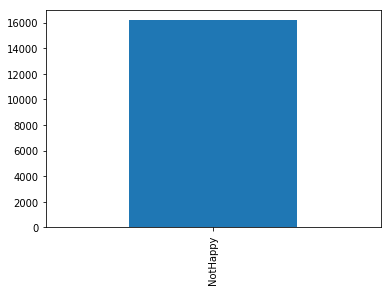

logistic
Accuracy on training set : 0.7496067786290527
Accuracy on testing set : 0.7494127827914452


In [79]:
clf_happy=MLPClassifier(alpha=1.999,activation='logistic')
run_nn(clf_happy,X_train_9th,y_train_9th,X_test_9th,y_test_9th)

C:\Users\mpfou\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


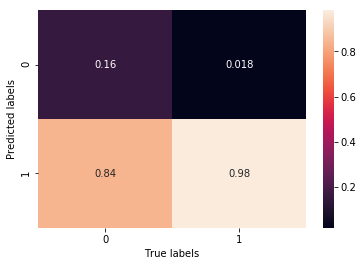

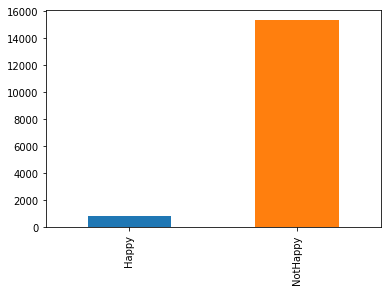

logistic
Accuracy on training set : 0.7830432797199249
Accuracy on testing set : 0.7747558412659167


In [83]:
clf_happy=MLPClassifier(alpha=1.999,momentum=0,solver='sgd')
run_nn(clf_happy,X_train_9th,y_train_9th,X_test_9th,y_test_9th)

## After moving 16000 rows from Happy dataset

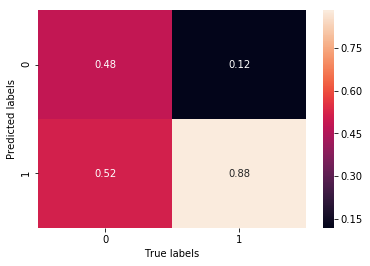

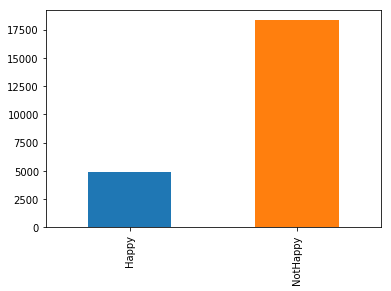

logistic
Accuracy on training set : 0.9870170745141239
Accuracy on testing set : 0.782595564759686


In [52]:
clf_happy=MLPClassifier()
run_nn(clf_happy,X_train_16th,y_train_16th,X_test_16th,y_test_16th)

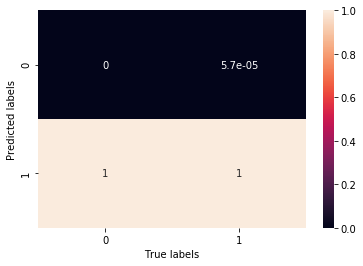

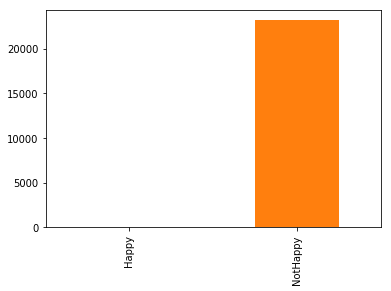

logistic
Accuracy on training set : 0.7471083484145093
Accuracy on testing set : 0.7507550263180602


In [80]:
clf_happy=MLPClassifier(alpha=1.999)
run_nn(clf_happy,X_train_16th,y_train_16th,X_test_16th,y_test_16th)

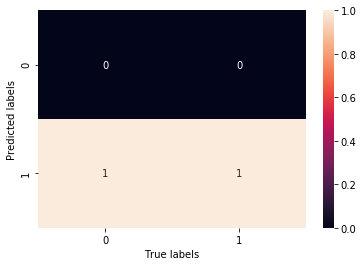

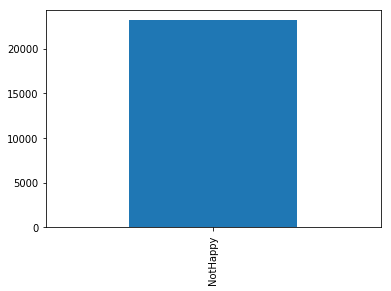

logistic
Accuracy on training set : 0.7471870328113935
Accuracy on testing set : 0.7507981706790923


In [81]:
clf_happy=MLPClassifier(alpha=1.999,activation='logistic')
run_nn(clf_happy,X_train_16th,y_train_16th,X_test_16th,y_test_16th)

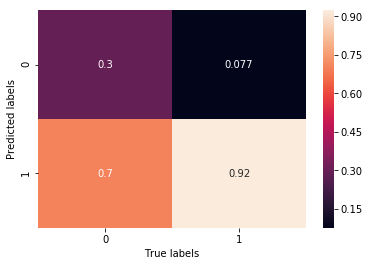

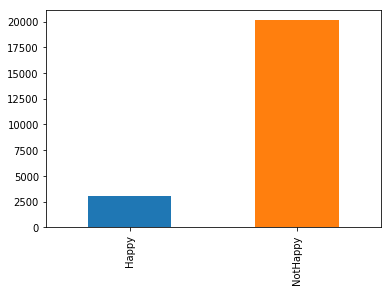

logistic
Accuracy on training set : 0.7908568730820679
Accuracy on testing set : 0.7671930278712572


In [82]:
clf_happy=MLPClassifier(alpha=1.999,momentum=0,solver='sgd')
run_nn(clf_happy,X_train_16th,y_train_16th,X_test_16th,y_test_16th)

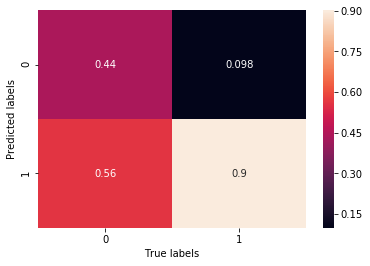

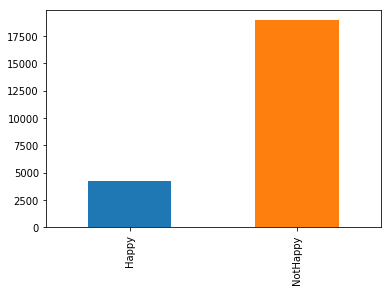

logistic
Accuracy on training set : 0.8637186245967424
Accuracy on testing set : 0.7867374234187592


In [53]:
clf_happy=MLPClassifier(activation='logistic',hidden_layer_sizes=(20,20), alpha=0.5,learning_rate='invscaling',momentum=0.01)
run_nn(clf_happy,X_train_16th,y_train_16th,X_test_16th,y_test_16th)

## Linear Classifier

In [10]:
#Linear classification on Happy dataset
model=LogisticRegression()
model.fit(X_train_happy,y_train_happy)
train_predictions=model.predict(X_train_happy)
test_predictions=model.predict(X_test_happy)
train_accuracy=accuracy_score(train_predictions,y_train_happy)
test_accuracy=accuracy_score(test_predictions,y_test_happy)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.800132362673726
Test Accuracy score: 0.7638617999442742


In [11]:
#Linear classification on Happy dataset
model=LogisticRegression()
model.fit(X_train_9th,y_train_9th)
train_predictions=model.predict(X_train_9th)
test_predictions=model.predict(X_test_9th)
train_accuracy=accuracy_score(train_predictions,y_train_9th)
test_accuracy=accuracy_score(test_predictions,y_test_9th)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.8137399157745192
Test Accuracy score: 0.7423043639510446


In [12]:
#Linear classification on Happy dataset
model=LogisticRegression()
model.fit(X_train_16th,y_train_16th)
train_predictions=model.predict(X_train_16th)
test_predictions=model.predict(X_test_16th)
train_accuracy=accuracy_score(train_predictions,y_train_16th)
test_accuracy=accuracy_score(test_predictions,y_test_16th)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.8338185537807853
Test Accuracy score: 0.730088877383726


## C=0.01

In [13]:
#Linear classification on Happy dataset
model=LogisticRegression(C=0.01)
model.fit(X_train_happy,y_train_happy)
train_predictions=model.predict(X_train_happy)
test_predictions=model.predict(X_test_happy)
train_accuracy=accuracy_score(train_predictions,y_train_happy)
test_accuracy=accuracy_score(test_predictions,y_test_happy)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.7901006652965968
Test Accuracy score: 0.7741710782947896


In [14]:
#Linear classification on Happy dataset
model=LogisticRegression(C=0.01)
model.fit(X_train_9th,y_train_9th)
train_predictions=model.predict(X_train_9th)
test_predictions=model.predict(X_test_9th)
train_accuracy=accuracy_score(train_predictions,y_train_9th)
test_accuracy=accuracy_score(test_predictions,y_test_9th)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.7962859607286011
Test Accuracy score: 0.764309556187415


In [15]:
#Linear classification on Happy dataset
model=LogisticRegression(C=0.01)
model.fit(X_train_16th,y_train_16th)
train_predictions=model.predict(X_train_16th)
test_predictions=model.predict(X_test_16th)
train_accuracy=accuracy_score(train_predictions,y_train_16th)
test_accuracy=accuracy_score(test_predictions,y_test_16th)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.8010858446770005
Test Accuracy score: 0.7650789541806886


## C=100

In [16]:
#Linear classification on Happy dataset
model=LogisticRegression(C=100)
model.fit(X_train_happy,y_train_happy)
train_predictions=model.predict(X_train_happy)
test_predictions=model.predict(X_test_happy)
train_accuracy=accuracy_score(train_predictions,y_train_happy)
test_accuracy=accuracy_score(test_predictions,y_test_happy)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.8003413563690829
Test Accuracy score: 0.761632766787406


In [17]:
#Linear classification on Happy dataset
model=LogisticRegression(C=100)
model.fit(X_train_9th,y_train_9th)
train_predictions=model.predict(X_train_9th)
test_predictions=model.predict(X_test_9th)
train_accuracy=accuracy_score(train_predictions,y_train_9th)
test_accuracy=accuracy_score(test_predictions,y_test_9th)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.8127251509462682
Test Accuracy score: 0.7396464334281122


In [18]:
#Linear classification on Happy dataset
model=LogisticRegression(C=100)
model.fit(X_train_16th,y_train_16th)
train_predictions=model.predict(X_train_16th)
test_predictions=model.predict(X_test_16th)
train_accuracy=accuracy_score(train_predictions,y_train_16th)
test_accuracy=accuracy_score(test_predictions,y_test_16th)
print("Train Accuracy score:",train_accuracy)
print("Test Accuracy score:",test_accuracy)

Train Accuracy score: 0.8348414509402785
Test Accuracy score: 0.7249546984209164
